# Checkpoint 2

### Version 2
**Note: this version has a minor correction to the `earth_mars_motion` function.**

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import integrate
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.optimize import minimize_scalar
from scipy.signal import argrelmin
from scipy.integrate import solve_bvp

In [ ]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 16

In [3]:
# Constants
G       = 6.67408e-11 # m^3 s^-1 kg^-2
AU      = 149.597e9 # m
Mearth  = 5.9721986e24 # kg
Mmars   = 6.41693e23 # kg
Msun    = 1.988435e30 # kg
day2sec = 3600 * 24 # seconds in one day

## Initial Conditions
Below are the initial positions and velocities for Earth and Mars.

In [4]:
# positions and velocities at t=0 (2019/6/2)
rs = [[-4.8957151e10, -1.4359284e11, 501896.65],  # Earth
      [-1.1742901e11, 2.1375285e11, 7.3558899e9]] # Mars (units of m)
vs = [[27712., -9730., -0.64148], # Earth
      [-20333., -9601., 300.34]]  # Mars (units of m/s)

## Historical Positions
Below are historical positions for Earth and Mars at t=-1000 days prior to 2019/6/2. These will be used in tasks 5 and 6.

In [5]:
# positions of the planets at (2019/6/2)-1000 days
rspast = [[1.44109e11, -4.45267e10, -509142.],   # Earth
          [1.11393e11, -1.77611e11, -6.45385e9]] # Mars

## Earth/Mars functions
Below are functions for the equations of motion (the vector of 1st derivtives) for Earth and Mars and for calculating the angle between Earth and Mars.

In [6]:
def earth_mars_motion(t, y):
    """
    # order of variables
    # 0,1,2 rx,ry,rz for Earth
    # 3,4,5 rx,ry,rz for Mars
    # 6,7,8 vx,vy,vz for Earth
    # 9,10,11 vx,vy,vz for Mars

    # order of derivatives:
    # 0,1,2 Drx,Dry,Drz for Earth
    # 3,4,5 Drx,Dry,Drz for Mars
    # 6,7,8 Dvx,Dvy,Dvz for Earth
    # 9,10,11 Dvx,Dvy,Dvy for Mars
    """

    rx1,ry1,rz1, rx2,ry2,rz2, vx1,vy1,vz1, vx2,vy2,vz2 = y
    drx1 = vx1
    dry1 = vy1
    drz1 = vz1
    drx2 = vx2
    dry2 = vy2
    drz2 = vz2
    
    GMmars  = G*Mmars
    GMearth = G*Mearth
    GMsun   = G*Msun
    
    rx12  = rx1 - rx2
    ry12  = ry1 - ry2
    rz12  = rz1 - rz2
    xyz12 = np.power(np.power(rx12,2) + np.power(ry12,2) + np.power(rz12,2), 1.5)
    xyz1  = np.power(np.power(rx1, 2) + np.power(ry1, 2) + np.power(rz1, 2), 1.5)
    xyz2  = np.power(np.power(rx2, 2) + np.power(ry2, 2) + np.power(rz2, 2), 1.5)

    dvx1 = -GMmars  * rx12 / xyz12 - GMsun * rx1 / xyz1
    dvy1 = -GMmars  * ry12 / xyz12 - GMsun * ry1 / xyz1
    dvz1 = -GMmars  * rz12 / xyz12 - GMsun * rz1 / xyz1
    dvx2 =  GMearth * rx12 / xyz12 - GMsun * rx2 / xyz2
    dvy2 =  GMearth * ry12 / xyz12 - GMsun * ry2 / xyz2
    dvz2 =  GMearth * rz12 / xyz12 - GMsun * rz2 / xyz2
    
    return np.array([drx1,dry1,drz1, drx2,dry2,drz2,
                     dvx1,dvy1,dvz1, dvx2,dvy2,dvz2])

def angle_between_planets(y):
    """
    Input should be same form as the y variable in the earth_mars_motion function.
    """
    r1 = y[0:3]
    r2 = y[3:6]
    return np.arccos((r1*r2).sum(axis=0) /
                     np.sqrt((r1*r1).sum(axis=0) * (r2*r2).sum(axis=0)))

## Task 1
Write a code that solves the equations and plots trajectories of Mars and Earth up to some $t_{max}$. The 3D plot should include at least one full orbit for each body.

In [7]:
### TASK 1
# Set t values
ts = np.linspace(1, 70000000,10000)
trange = (ts[0], ts[-1])
#intial values
initialvals=np.array([rs[0][0],rs[0][1],rs[0][2],rs[1][0],rs[1][1],rs[1][2],vs[0][0],vs[0][1],vs[0][2],vs[1][0],vs[1][1],vs[1][2]])

In [8]:
sol = solve_ivp(earth_mars_motion,trange,initialvals,t_eval=ts,dense_output=True,max_step=10000)

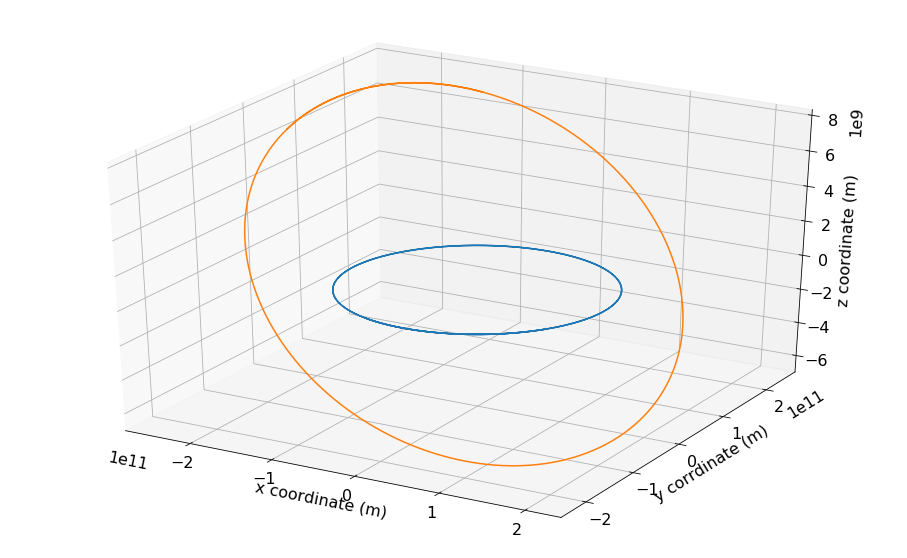

In [9]:
fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')
ax.set_xlabel('x coordinate (m)')
ax.set_ylabel('y corrdinate (m)')
ax.set_zlabel('z coordinate (m)')
plt.plot(sol.y[0], sol.y[1], sol.y[2])
plt.plot(sol.y[3], sol.y[4], sol.y[5])

## Task 2
Find the time of the next opposition to $\pm10$ days. Return the time in days from $t_0$ = 2 June 2019.

In [10]:
def time_to_next_opposition():
    theta=angle_between_planets(sol.y)
    return(ts[np.argmin(theta)]/day2sec)

In [11]:
t_opp = time_to_next_opposition()
print (f"Next opposition in {t_opp} days.")

Next opposition in 500.2583635967764 days.


## Task 3
Find the times for 10 oppositions in days since 2 June 2019. The results must be accurate to 1 day. Convert this to dates (year/month/day) and print out on the screen. Do not worry if the dates come out different than the actual dates you can find online, it’s supposed to be like that.

The `calculate_oppositions` function should return a list of the ten next opposition times after 2 June, 2019. The times should be returned in units of days. You may create additional functions outside this cell that are called by `calculate_oppositions`.

In [12]:
ts1 = np.linspace(1,20*day2sec*395,86000)
trange1=(ts1[0],ts1[-1])
sol1 = solve_ivp(earth_mars_motion,trange1,initialvals,t_eval=ts1,dense_output=True,max_step=86000)

In [13]:
def calculate_oppositions():
    theta=angle_between_planets(sol1.y)
    return(ts1[argrelmin(theta)]/day2sec)

In [14]:
from datetime import datetime, timedelta

opp_times  = calculate_oppositions()

date0      = datetime(2019,6,2)

for t in opp_times:

    print(f"t = {t:.2f} day: "+(date0+timedelta(t)).strftime("%d %b %Y %H:%M:%S"))

t = 500.28 day: 14 Oct 2020 06:40:12
t = 1285.88 day: 08 Dec 2022 21:03:57
t = 2056.14 day: 17 Jan 2025 03:16:51
t = 2821.16 day: 21 Feb 2027 03:49:45
t = 3586.18 day: 27 Mar 2029 04:22:39
t = 4356.90 day: 06 May 2031 21:36:57
t = 5143.05 day: 01 Jul 2033 01:14:24
t = 5953.64 day: 19 Sep 2035 15:18:29
t = 6748.97 day: 22 Nov 2037 23:23:59
t = 7523.28 day: 06 Jan 2040 06:37:13


In [15]:
opp_times  = calculate_oppositions()
opp_times *= day2sec
date0      = datetime.fromisoformat('2019-06-02')
timestamp0 = datetime.timestamp(date0)
for t in opp_times:
    print(f"t = {t/day2sec:.2f} day: {datetime.fromtimestamp(t+timestamp0)}")

t = 500.28 day: 2020-10-14 06:40:12.378667
t = 1285.88 day: 2022-12-08 21:03:57.812079
t = 2056.14 day: 2025-01-17 03:16:51.556134
t = 2821.16 day: 2027-02-21 03:49:45.621786
t = 3586.18 day: 2029-03-27 04:22:39.687438
t = 4356.90 day: 2031-05-06 21:36:57.613810
t = 5143.05 day: 2033-07-01 01:14:24.066001
t = 5953.64 day: 2035-09-19 15:18:29.017407
t = 6748.97 day: 2037-11-22 23:23:59.115920
t = 7523.28 day: 2040-01-06 06:37:13.664357


## Task 4
Estimate standard errors of these times assuming that all initial positions and velocities (12 numbers) are normally distributed random numbers with means as specified in the list of parameters, and coefficients of variation (standard deviation divided by the mean) equal to 3x10$^{-5}$.

The `estimate_errors` function should return two lists:
1. a list (or array) of the mean opposition times for 10 oppositions
2. a list (or array) of the standard deviation for each time


Units should be in days.

In [16]:
def calculate_oppositions_new(init):
    ts= np.linspace(1,20*day2sec*395,86000)
    trange=(ts[0],ts[-1])
    initialvals=init
    sol = solve_ivp(earth_mars_motion,trange,initialvals,t_eval=ts,dense_output=True,max_step=86000)
    theta=angle_between_planets(sol.y)
    return(ts[argrelmin(theta)]/day2sec)       

In [17]:
def estimate_errors():
    initialvals=np.array([rs[0][0],rs[0][1],rs[0][2],rs[1][0],rs[1][1],rs[1][2],vs[0][0],vs[0][1],vs[0][2],vs[1][0],vs[1][1],vs[1][2]])
    sample=[]
    data=[]
    n=40
    
    for i in range(n):
        sample.append(np.random.normal(initialvals,abs(initialvals*3*10**-5)))
        data.append(calculate_oppositions_new(np.array(sample)[i]))
        
    gooddata=np.array(data)
    means=(np.mean(gooddata[:,0]),np.mean(gooddata[:,1]),np.mean(gooddata[:,2]),np.mean(gooddata[:,3]),np.mean(gooddata[:,4]),np.mean(gooddata[:,5]),np.mean(gooddata[:,6]),np.mean(gooddata[:,7]),np.mean(gooddata[:,8]),np.mean(gooddata[:,9]))
    std=(np.std(gooddata[:,0]),np.std(gooddata[:,1]),np.std(gooddata[:,2]),np.std(gooddata[:,3]),np.std(gooddata[:,4]),np.std(gooddata[:,5]),np.std(gooddata[:,6]),np.std(gooddata[:,7]),np.std(gooddata[:,8]),np.std(gooddata[:,9]))
    return means, std
#2 mins 50 seconds for n=30,  mikes methods
#2 mins 24 seconds for n=30, my method

In [18]:
tmean, tstd = estimate_errors()
for i in range(10):
    print(f"{i}: {tmean[i]:.2f} +- {tstd[i]:.2f} days.")

0: 500.29 +- 0.14 days.
1: 1285.90 +- 0.30 days.
2: 2056.24 +- 0.41 days.
3: 2821.26 +- 0.54 days.
4: 3586.40 +- 0.71 days.
5: 4357.11 +- 0.96 days.
6: 5143.36 +- 1.48 days.
7: 5954.03 +- 1.90 days.
8: 6749.31 +- 1.60 days.
9: 7523.68 +- 1.51 days.


## Task 5
Use historical positions of Earth and Mars (boundary value problem) to improve the accuracy of your prediction. What are the standard errors now?

The `estimate_errors_improved` function should return two lists:
1. a list (or array) of the mean opposition times for 10 oppositions
2. a list (or array) of the standard deviation for each time

Units should be in days.

In [19]:
randomized_historical=np.random.normal(np.array(rspast),abs(np.array(rspast)*3*10**-5))
randomized_initial=np.random.normal(np.array(rs),abs(np.array(rs)*3*10**-5))
randomized_velocity = np.random.normal(np.array(vs),abs(np.array(vs)*3*10**-5))

In [20]:
def bc(ya, yb):
    return np.array([np.abs(ya[0] - randomized_historical[0][0]), np.abs(ya[1] - randomized_historical[0][1]), np.abs(ya[2] - randomized_historical[0][2]), np.abs(ya[3] - randomized_historical[1][0]), np.abs(ya[4] - randomized_historical[1][1]), np.abs(ya[5] - randomized_historical[1][2]), np.abs(yb[0] - randomized_initial[0][0]), np.abs(yb[1] - randomized_initial[0][1]), np.abs(yb[2] - randomized_initial[0][2]), np.abs(yb[3] - randomized_initial[1][0]), np.abs(yb[4] - randomized_initial[1][1]), np.abs(yb[5] - randomized_initial[1][2])])
    

In [21]:
def calculate_good_initialval():

    initialvals=np.array([randomized_initial[0][0],randomized_initial[0][1],randomized_initial[0][2],randomized_initial[1][0],randomized_initial[1][1],randomized_initial[1][2],randomized_velocity[0][0],randomized_velocity[0][1],randomized_velocity[0][2],randomized_velocity[1][0],randomized_velocity[1][1],randomized_velocity[1][2]])
    ts = np.linspace(0, -1000*day2sec, 1000)
    trange = (ts[0], ts[-1])
    sol = solve_ivp(earth_mars_motion,trange,initialvals,t_eval=ts,dense_output=True,max_step=86000)
    y_guess=np.array([sol.y[0][::-1],sol.y[1][::-1],sol.y[2][::-1],sol.y[3][::-1],sol.y[4][::-1],sol.y[5][::-1],sol.y[6][::-1],sol.y[7][::-1],sol.y[8][::-1],sol.y[9][::-1],sol.y[10][::-1],sol.y[11][::-1]])
    
    x = np.linspace(-1000*day2sec, 0, 1000)
    sol = solve_bvp(earth_mars_motion, bc, x, y_guess, verbose=0)
    y_good_init = sol.sol(np.linspace(-1000*day2sec, 0, 86000))
    y = np.array([y_good_init[0][-1], y_good_init[1][-1], y_good_init[2][-1], y_good_init[3][-1], y_good_init[4][-1], y_good_init[5][-1],y_good_init[6][-1], y_good_init[7][-1], y_good_init[8][-1], y_good_init[9][-1], y_good_init[10][-1], y_good_init[11][-1]])
    
    
    return y
  

In [22]:
def estimate_errors_improved():
    
    global randomized_initial,randomized_velocity, randomized_historical

    data=[]
    n=30
    
    for i in range(n):
        randomized_historical=np.random.normal(np.array(rspast),np.abs(np.array(rspast)*3*10**-5))
        randomized_initial=np.random.normal(np.array(rs),np.abs(np.array(rs)*3*10**-5))
        randomized_velocity = np.random.normal(np.array(vs),np.abs(np.array(vs)*3*10**-5))
        data.append(calculate_oppositions_new(calculate_good_initialval()))
    gooddata=np.array(data)
    means=(np.mean(gooddata[:,0]),np.mean(gooddata[:,1]),np.mean(gooddata[:,2]),np.mean(gooddata[:,3]),np.mean(gooddata[:,4]),np.mean(gooddata[:,5]),np.mean(gooddata[:,6]),np.mean(gooddata[:,7]),np.mean(gooddata[:,8]),np.mean(gooddata[:,9]))
    std=(np.std(gooddata[:,0]),np.std(gooddata[:,1]),np.std(gooddata[:,2]),np.std(gooddata[:,3]),np.std(gooddata[:,4]),np.std(gooddata[:,5]),np.std(gooddata[:,6]),np.std(gooddata[:,7]),np.std(gooddata[:,8]),np.std(gooddata[:,9]))
    
    return means,std
    

In [23]:
tmean, tstd = estimate_errors_improved()
for i in range(10):
    print(f"{i}: {tmean[i]:.2f} +- {tstd[i]:.2f} days.")

0: 500.13 +- 0.09 days.
1: 1285.24 +- 0.08 days.
2: 2055.14 +- 0.08 days.
3: 2819.74 +- 0.11 days.
4: 3584.48 +- 0.14 days.
5: 4354.75 +- 0.22 days.
6: 5140.47 +- 0.39 days.
7: 5950.68 +- 0.49 days.
8: 6745.73 +- 0.35 days.
9: 7519.79 +- 0.28 days.


##  Task 6
Using the methods from Task 5, is there a better time point in the last 1000 days to get historical data for increasing the accuracy? Find such time t in the past 1000 days (-1000<$t$<0 days, where $t$=0 corresponds to 2 June 2019) which would yield a maximum error (std. deviation) of less than 0.2 days for each of the 10 oppositions.

$t$ should be a negative number, accurate to +/- 50 days.

The code for task 6 can take any form you like.

In [24]:
print("-280")

-280
